In [ ]:
Dentro de los asteroides también se encontró hierro, parece que los principales indicadores
de la cantidad de hierro son las piedras violetas y el tamaño de los mismos.

Con los datos recolectados R4 tratar de predecir la cantidad de hierro que tendrá un asteroide.

In [135]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [136]:
df = pd.read_csv('R4.csv')

In [113]:
df.describe()

,violet_stone_count,asteroid_size_km3,iron_kg
count,100.000000,100.000000,100.000000
mean,71.690000,0.654088,60.335629
std,44.399403,0.247960,31.515357
min,1.000000,0.114662,6.995585
25%,31.500000,0.497146,35.211681
50%,70.000000,0.664570,56.636521
75%,109.000000,0.784425,81.248217
max,149.000000,1.279256,139.324038


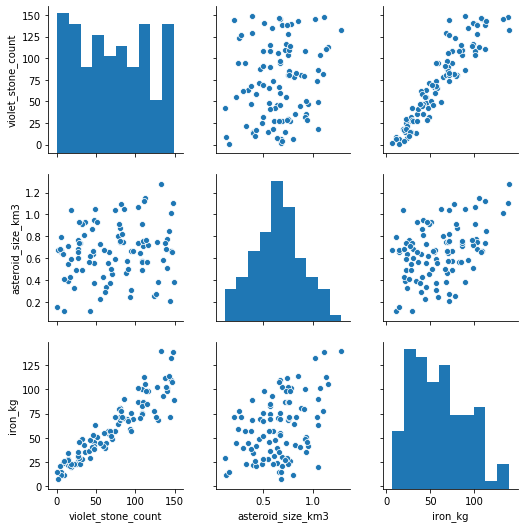

In [114]:
sns.pairplot(df)

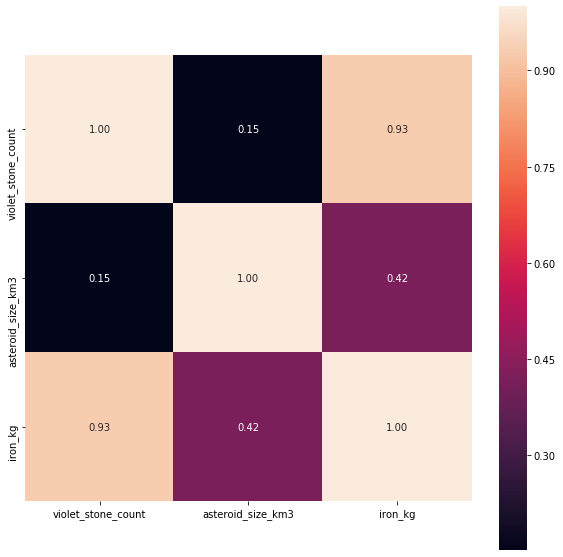

In [4]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

In [ ]:
# SHOULD CHECK LINEAR REGRESSION Assumptions !!! See R3 analysis !!
https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

## Fit Model 

In [137]:
def print_model_statistics(regr, y_test, y_pred):

    # The coefficients
    print('Coefficients: ', regr.coef_)

    # The intercept_ 
    print('Intercept (Y axis when X = 0): ', regr.intercept_)

    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    print('Coefficient of determination: %.2f' % r2)
    
    # Adjusted r2
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1-r2) * (n-1)/(n-p-1)
    print('Adjusted r2: %.2f' % adjusted_r2)
    

In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features.to_numpy(), i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [45]:
X = df[['violet_stone_count', 'asteroid_size_km3']]
y = df.iron_kg

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [78]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

Coefficients:  [ 0.60859656 38.94730251]
Intercept (Y axis when X = 0):  -9.298771586994256
Mean squared error: 80.97
Coefficient of determination: 0.94
Adjusted r2: 0.93


In [109]:
print("- Intercept (Y axis when X = 0) is negative, makes non sense this.")

- Intercept (Y axis when X = 0) is negative, makes non sense this.


## feature engineering 

In [143]:
#feature engineering
df_ = df.copy()
df_["violet_stone_count_x_size_km3"] = df.asteroid_size_km3 * df.violet_stone_count

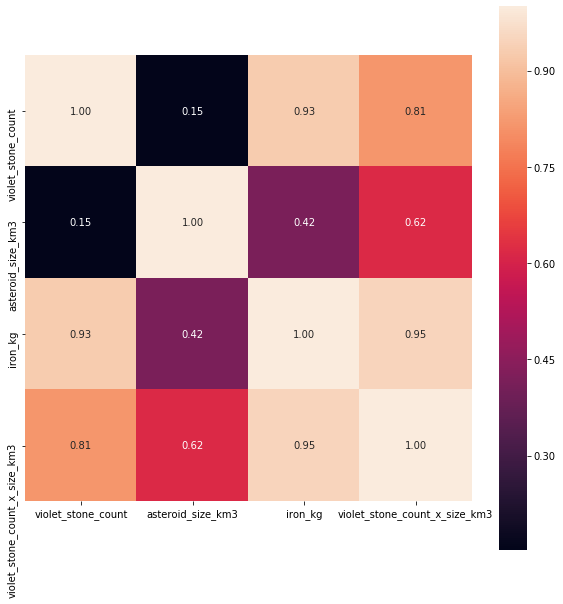


- We can observe a high correlation between the new feature and violet_stone_count and asteroid_size_km3


In [139]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_.corr(), square=True, annot=True, fmt='.2f')
plt.show()
print()
print("- We can observe a high correlation between the new feature and violet_stone_count and asteroid_size_km3")

In [159]:
X = df_[['violet_stone_count', 'asteroid_size_km3', 'violet_stone_count_x_size_km3']]
y = df_.iron_kg

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)
print()
print("- Coefficients has a negative component, this is nonsense.")

Coefficients:  [13.82892941 -0.90996944 19.49278972]
Intercept (Y axis when X = 0):  60.07918559206321
Mean squared error: 36.35
Coefficient of determination: 0.97
Adjusted r2: 0.96

- Coefficients has a negative component, this is nonsense.


## final model! 

In [162]:
#
# - We'll remove asteroid_size_km3 and maintain violet_stone_count_x_size_km3
#

X = df_[['violet_stone_count', 'violet_stone_count_x_size_km3']]
y = df_.iron_kg

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

Coefficients:  [14.52659394 17.64083323]
Intercept (Y axis when X = 0):  61.22614839299214
Mean squared error: 36.33
Coefficient of determination: 0.97
Adjusted r2: 0.96


Assumption 3: Little to no multicollinearity among predictors


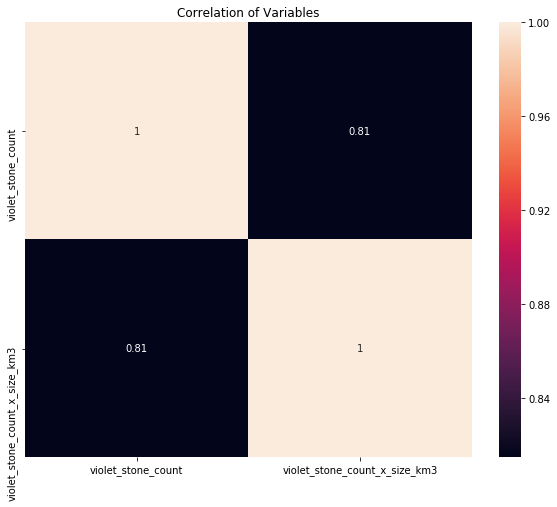

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 7.80111983347286
X2: 7.80111983347286

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [166]:
linear_feature_names = ['X'+str(feature+1) for feature in range(X.shape[1])]
multicollinearity_assumption(regr, X, y, linear_feature_names)

In [ ]:
#difference between r2_score and explained_variance_score?
https://stackoverflow.com/questions/24378176/python-sci-kit-learn-metrics-difference-between-r2-score-and-explained-varian

In [ ]:
#adjusted r squared
https://datascience.stackexchange.com/questions/14693/what-is-the-difference-of-r-squared-and-adjusted-r-squared
https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp

In [ ]:
#Difference between preprocessing train and test set before and after splitting
https://stats.stackexchange.com/questions/267012/difference-between-preprocessing-train-and-test-set-before-and-after-splitting

In [ ]:
#interaction effects and interaction plots!
https://statisticsbyjim.com/regression/interaction-effects/